# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import numpy and pandas

import numpy as np
import pandas as pd

# Challenge 1 - Loading and Evaluating The Data

In this lab, we will look at a dataset of sensor data from a cellular phone. The phone was carried in the subject's pocket for a few minutes while they walked around.

To load the data, run the code below.

In [2]:
# Run this code:

sensor = pd.read_csv('../sub_1.csv')
sensor.drop(columns=['Unnamed: 0'], inplace=True)

Examine the data using the `head` function.

In [3]:
# Your code here:

sensor.head()


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Check whether there is any missing data. If there is any missing data, remove the rows containing missing data.

In [4]:
# Your code here:

sensor.dropna(axis=0)


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
1,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
3,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
4,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299
...,...,...,...,...,...,...,...,...,...,...,...,...
1746,1.797120,-0.562324,2.445889,0.824443,0.533154,0.189844,-0.123211,0.909536,-0.379757,-0.268367,0.006733,-0.064874
1747,1.814297,-0.569719,2.449655,0.817212,0.539396,0.203020,-0.057641,0.723118,-0.437812,-0.102444,-0.060666,-0.229738
1748,1.830821,-0.578367,2.447967,0.809207,0.546658,0.215288,0.343238,0.997236,-0.338155,-0.085590,-0.030209,-0.087740
1749,1.849557,-0.586962,2.439458,0.800485,0.553834,0.229110,0.470144,1.227937,-0.332223,-0.048105,0.029555,0.060441


How many rows and columns are in our data?

In [5]:
# Your code here:

n_cols = len(sensor.columns)
n_rows = len(sensor.T.columns)

print(n_cols,n_rows)

12 1751


To perform time series analysis on the data, we must change the index from a range index to a time series index. In the cell below, create a time series index using the `pd.date_range` function. Create a time series index starting at 1/1/2018 00:00:00 and ending at 1/1/2018 00:29:10. The number of periods is equal to the number of rows in `sensor`. The frequency should be set to `infer`.

In [6]:
# Your code here:

time_series_index = pd.date_range(start="1/1/2018 00:00:00",end="1/1/2018 00:29:10",periods=n_rows)
time_series_index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:00:01',
               '2018-01-01 00:00:02', '2018-01-01 00:00:03',
               '2018-01-01 00:00:04', '2018-01-01 00:00:05',
               '2018-01-01 00:00:06', '2018-01-01 00:00:07',
               '2018-01-01 00:00:08', '2018-01-01 00:00:09',
               ...
               '2018-01-01 00:29:01', '2018-01-01 00:29:02',
               '2018-01-01 00:29:03', '2018-01-01 00:29:04',
               '2018-01-01 00:29:05', '2018-01-01 00:29:06',
               '2018-01-01 00:29:07', '2018-01-01 00:29:08',
               '2018-01-01 00:29:09', '2018-01-01 00:29:10'],
              dtype='datetime64[ns]', length=1751, freq=None)

Assign the time series index to the dataframe's index.

In [7]:
# Your code here:

sensor.date = pd.to_datetime(time_series_index)
sensor.index = pd.DatetimeIndex(sensor.date,freq='infer')
sensor.head()

/home/dfernandez/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
2018-01-01 00:00:00,1.528132,-0.733896,0.696372,0.741895,0.669768,-0.031672,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542
2018-01-01 00:00:01,1.527992,-0.716987,0.677762,0.753099,0.657116,-0.032255,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866
2018-01-01 00:00:02,1.527765,-0.706999,0.670951,0.759611,0.649555,-0.032707,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808
2018-01-01 00:00:03,1.516768,-0.704678,0.675735,0.760709,0.647788,-0.041140,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958
2018-01-01 00:00:04,1.493941,-0.703918,0.672994,0.760062,0.647210,-0.058530,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299


Our next step is to decompose the time series and evaluate the patterns in the data. Load the `statsmodels.api` submodule and plot the decomposed plot of `userAcceleration.x`. Set `freq=60` in the `seasonal_decompose` function. Your graph should look like the one below.

![time series decomposition](../images/tsa_decompose.png)

In [8]:
# Your code here:
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(sensor['userAcceleration.x'],freq=60)
print(res.plot())

Figure(640x480)


Plot the decomposed time series of `rotationRate.x` also with a frequency of 60.

Figure(432x288)


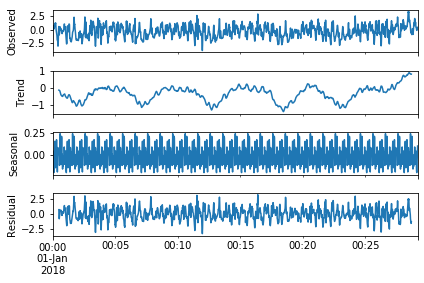

In [9]:
res2 = sm.tsa.seasonal_decompose(sensor['rotationRate.x'],freq=60)
print(res2.plot())

# Challenge 2 - Modelling the Data

To model our data, we should look at a few assumptions. First, let's plot the `lag_plot` to detect any autocorrelation. Do this for `userAcceleration.x`

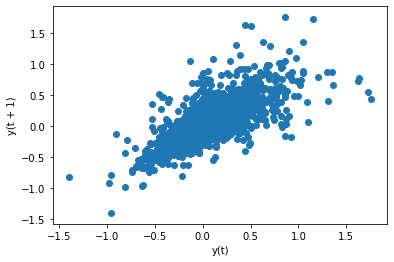

In [10]:
# Your code here:

from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(sensor['userAcceleration.x'])
pyplot.show()


Create a lag plot for `rotationRate.x`

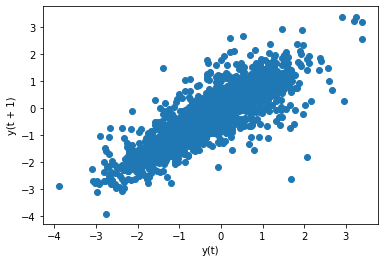

In [11]:
# Your code here:

lag_plot(sensor['rotationRate.x'])
pyplot.show()


What are your conclusions from both visualizations?

In [12]:
# Your conclusions here:
'''
Se puede ver que ambos tienen una cierta correlación lineal, siendo que el primero tiende a dispersarse en 
los valores más altos
'''

'\nSe puede ver que ambos tienen una cierta correlación lineal, siendo que el primero tiende a dispersarse en \nlos valores más altos\n'

The next step will be to test both variables for stationarity. Perform the Augmented Dickey Fuller test on both variables below.

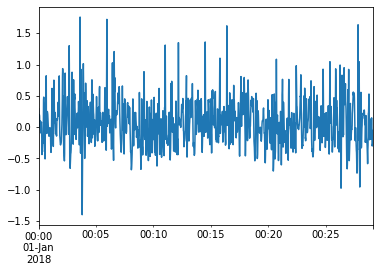

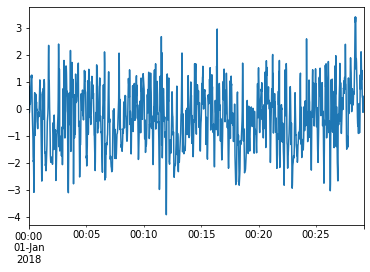

In [13]:
# Your code here:
import matplotlib.pyplot as plt

plt.subplot(1,1,1)
series = sensor['userAcceleration.x']
series.plot()
pyplot.show()
plt.subplot(1,1,1)
series2 = sensor['rotationRate.x']
series2.plot()
pyplot.show()


What are your conclusions from this test?

In [14]:
# Your conclusions here:

# https://machinelearningmastery.com/time-series-data-stationary-python/
# Según sugieren los resultados ambas variables son estacionarias.

Finally, we'll create an ARMA model for `userAcceleration.x`. Load the `ARMA` function from `statsmodels`. The order of the model is (2, 1). Split the data to train and test. Use the last 10 observations as the test set and all other observations as the training set. 

In [15]:
# Your code here:
from statsmodels.tsa.arima_model import ARMA

train, test = sensor['userAcceleration.x'][:-10], sensor['userAcceleration.x'][-10:]
print(len(train),len(test))

model = ARMA(train, order=(2, 1))
model_fit = model.fit(disp=False)

predictions_ARMA = model_fit.predict(len(train), len(train)+len(test)-1)

df = pd.DataFrame(predictions_ARMA)
df = df.rename(columns={0:'predictions'})
df

1741 10


,predictions
2018-01-01 00:29:01,0.173149
2018-01-01 00:29:02,0.142896
2018-01-01 00:29:03,0.100522
2018-01-01 00:29:04,0.070106
2018-01-01 00:29:05,0.056099
2018-01-01 00:29:06,0.053778
2018-01-01 00:29:07,0.056790
2018-01-01 00:29:08,0.060646
2018-01-01 00:29:09,0.063316
2018-01-01 00:29:10,0.064493


To compare our predictions with the observed data, we can compute the RMSE (Root Mean Squared Error) from the submodule `statsmodels.tools.eval_measures`. You can read more about this function [here](https://www.statsmodels.org/dev/generated/statsmodels.tools.eval_measures.rmse.html). Compute the RMSE for the last 10 rows of the data by comparing the observed and predicted data for the `userAcceleration.x` column.

In [16]:
# Your code here:
from statsmodels.tools.eval_measures import rmse 
rmse(predictions_ARMA,test)

0.22529863653820809

In [17]:
df["GT"] = sensor['userAcceleration.x'][-10:]
df["diff_arma"] = df['predictions'] - df["GT"]

In [18]:
df

,predictions,GT,diff_arma
2018-01-01 00:29:01,0.173149,0.149749,0.023400
2018-01-01 00:29:02,0.142896,0.038461,0.104435
2018-01-01 00:29:03,0.100522,-0.169175,0.269697
2018-01-01 00:29:04,0.070106,-0.300361,0.370467
2018-01-01 00:29:05,0.056099,-0.270174,0.326273
2018-01-01 00:29:06,0.053778,-0.268367,0.322145
2018-01-01 00:29:07,0.056790,-0.102444,0.159234
2018-01-01 00:29:08,0.060646,-0.085590,0.146236
2018-01-01 00:29:09,0.063316,-0.048105,0.111421
2018-01-01 00:29:10,0.064493,-0.065011,0.129504
